# 支持向量机 

此代码参考 阿里天池：https://tianchi.aliyun.com/notebook/192338  推荐自学 

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 

from pathlib import Path

IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1 线性支持向量机

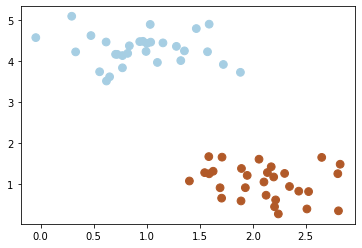

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# 画图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)

现在需要一个线性分类器，将这些数据分开来。

我们可能会有多种分法：

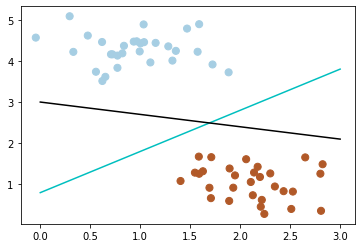

In [3]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)
# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')

那么现在有一个问题，两个分类器，哪一个更好呢？

为了判断好坏，我们需要引入一个准则：**好的分类器不仅仅是能够很好的分开已有的数据集，还能对未知数据集进行两个的划分。**

假设，现在有一个属于红色数据点的新数据（3， 2.8）

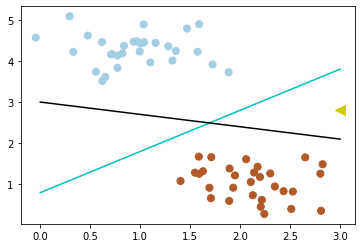

In [4]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.scatter([3], [2.8], c='#cccc00', marker='<', s=100, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)

# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')

可以看到，此时黑色的线会把这个新的数据集分错，而蓝色的线不会。

我们刚刚举的例子可能会带有一些主观性。

那么如何客观的评判两条线的健壮性呢？

此时，我们需要引入一个非常重要的概念：**最大间隔**。

最大间隔刻画着当前分类器与数据集的边界，以这两个分类器为例：

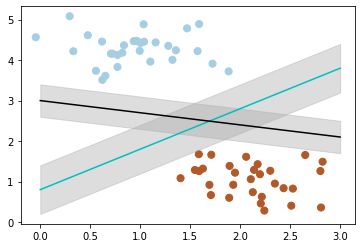

In [5]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

x_fit = np.linspace(0, 3)

# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
# 画边距
plt.fill_between(x_fit, y_1 - 0.6, y_1 + 0.6, edgecolor='none', color='#AAAAAA', alpha=0.4)

y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')
plt.fill_between(x_fit, y_2 - 0.4, y_2 + 0.4, edgecolor='none', color='#AAAAAA', alpha=0.4)


可以看到， 蓝色的线最大间隔是大于黑色的线的。

所以我们会选择蓝色的线作为我们的分类器。

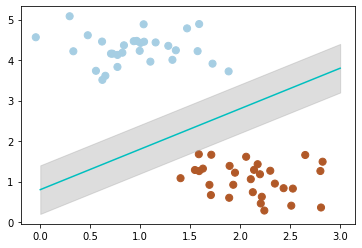

In [6]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# 画图
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
# 画边距
plt.fill_between(x_fit, y_1 - 0.6, y_1 + 0.6, edgecolor='none', color='#AAAAAA', alpha=0.4)

那么，我们现在的分类器是最优分类器吗？

或者说，有没有更好的分类器，它具有更大的间隔？

答案是有的。

为了找出最优分类器，我们需要引入我们今天的主角：SVM

In [7]:
from sklearn.svm import SVC
# SVM 函数
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [8]:
# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]

# 最大边距 下界
b_down = clf.support_vectors_[0]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上界
b_up = clf.support_vectors_[-1]
y_up = a* x_fit + b_up[1] - a * b_up[0]
w,a,b_down,b_up

(array([ 0.16690023, -1.00107119]),
 0.1667216390905323,
 array([0.62115578, 3.51146874]),
 array([1.58601816, 1.67511213]))

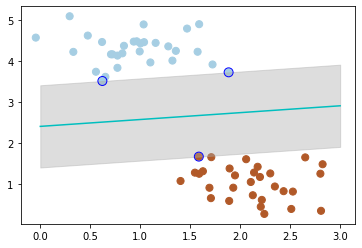

In [9]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

带黑边的点是距离当前分类器最近的点，我们称之为**支持向量**。

支持向量机为我们提供了在众多可能的分类器之间进行选择的原则，从而确保对未知数据集具有更高的泛化性。

## 2 软间隔支持向量机 

但很多时候，我们拿到的数据是这样子的

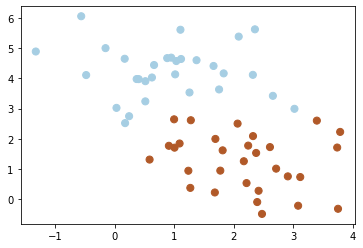

In [10]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

这种情况并不容易找到这样的最大间隔。

于是我们就有了软间隔，相比于硬间隔而言，我们允许个别数据出现在间隔带中。

我们知道，如果没有一个原则进行约束，满足软间隔的分类器也会出现很多条。

所以需要对分错的数据进行惩罚，SVC 函数中，有一个参数 C 就是惩罚参数。

惩罚参数越小，容忍性就越大。

以 C=1 为例子，比如说：

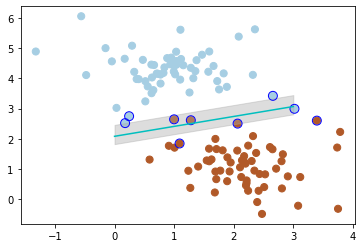

In [11]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 惩罚参数：C=1 
clf = SVC(C=1, kernel='linear')
clf.fit(X, y)

# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]
# 最大边距 下届
b_down = clf.support_vectors_[0]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上届
b_up = clf.support_vectors_[-1]
y_up = a* x_fit + b_up[1] - a * b_up[0]

# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

惩罚参数 C=0.2 时，SVM 会更具包容性，从而兼容更多的错分样本：

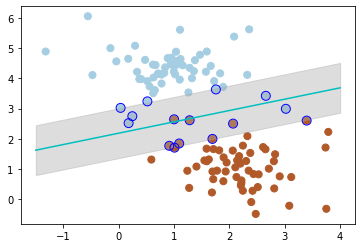

In [12]:
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 惩罚参数：C=0.2 
clf = SVC(C=0.2, kernel='linear')
clf.fit(X, y)

x_fit = np.linspace(-1.5, 4)
# 最佳函数
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]
# 最大边距 下届
b_down = clf.support_vectors_[10]
y_down = a* x_fit + b_down[1] - a * b_down[0]
# 最大边距 上届
b_up = clf.support_vectors_[1]
y_up = a* x_fit + b_up[1] - a * b_up[0]

# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# 画函数
plt.plot(x_fit, y_3, '-c')
# 画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none', color='#AAAAAA', alpha=0.4)
# 画支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')

## 3 非线性支持向量机  

如果我们遇到这样的数据集，没有办法利用线性分类器进行分类。

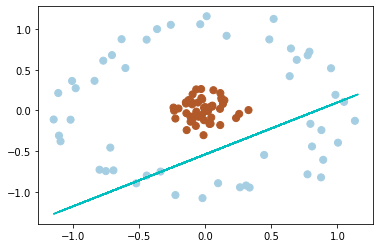

In [13]:
from sklearn.datasets import make_circles
# 画散点图
X, y = make_circles(100, factor=.1, noise=.1, random_state=2023)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

clf = SVC(kernel='linear').fit(X, y)

# 最佳函数
x_fit = np.linspace(-1.5, 1.5)
w = clf.coef_[0]
a = -w[0] / w[1]
y_3 = a*X - (clf.intercept_[0]) / w[1]

plt.plot(X, y_3, '-c')

将二维（低维）空间的数据映射到三维（高维）空间中。

映射的目的在于使用 SVM 在高维空间找到超平面的能力。

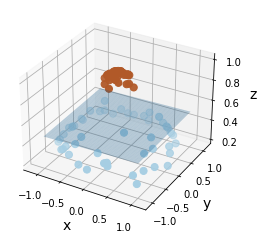

In [14]:
# 数据映射
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_1, y_1 = np.meshgrid(np.linspace(-1, 1), np.linspace(-1, 1))
z =  0.01*x_1 + 0.01*y_1 + 0.5
ax.plot_surface(x_1, y_1, z, alpha=0.3)

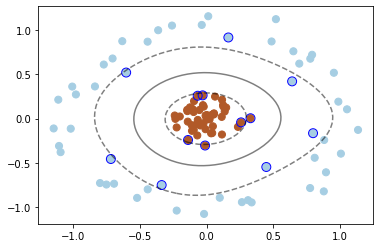

In [15]:
# 画图
X, y = make_circles(100, factor=.1, noise=.1, random_state=2023)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = SVC(kernel='rbf')
clf.fit(X, y)


ax = plt.gca()
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
x_1, y_1 = np.meshgrid(x, y)
P = np.zeros_like(x_1)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        P[i, j] = clf.decision_function(np.array([[xi, yj]]))
ax.contour(x_1, y_1, P, colors='k', levels=[-1, 0, 0.9], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none');

## 4 支持向量机-鸢尾花数据集分类

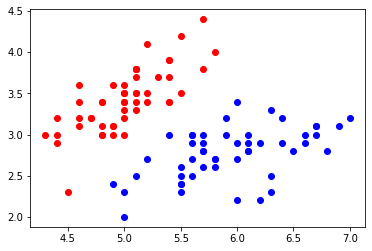

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
 
iris = datasets.load_iris()  # 加载鸢尾花数据集
X = iris.data  # 样本特征
y = iris.target  # 样本标签
X = X[y<2,:2]  # 选择前两种花，为了可视化，只选择前两个特征
y = y[y<2]
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
# 拆分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)
from sklearn.preprocessing import StandardScaler
 
# 标准化样本特征
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
 
# 使用SVC分类
from sklearn.svm import SVC
 
# 使用rbf核函数，相应地设置rbf核函数的gamma参数，C是正则化参数
svc = SVC(C=1.0,kernel="rbf",gamma=1.0)
svc.fit(X_train_std,y_train)  # 训练样本集上拟合
svc.score(X_test_std,y_test)   # 测试样本集上测试分类准确率

1.0

In [18]:
iris = datasets.load_iris()  # 加载鸢尾花数据集
X = iris.data  # 样本特征
y = iris.target  # 样本标签

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

# 标准化样本特征
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
 
# 使用rbf核函数，相应地设置rbf核函数的gamma参数，C是正则化参数
svc = SVC(C=1.0,kernel="rbf",gamma=1.0)
svc.fit(X_train_std,y_train)  # 训练样本集上拟合
svc.score(X_test_std,y_test)   # 测试样本集上测试分类准确率

0.9473684210526315

**基于SVM、Pipeline、GridSearchCV的鸢尾花分类** 

- ShuffleSplit实例化交叉验证对象。
- Pipeline和GridSearchCV结合使用搜索模型最优参数。 

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


pipe_steps = [
    ('svc', SVC())
]
pipeline = Pipeline(pipe_steps)
cv_split = ShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)
param_grid = {
    'svc__cache_size' : [100, 200, 400],
    'svc__C': [1, 10, 100],
    'svc__kernel' : ['rbf', 'linear'],
    'svc__degree' : [1, 2, 3, 4],
}
grid = GridSearchCV(pipeline, param_grid, cv=cv_split)
grid.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=0.7),
             estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [1, 10, 100],
                         'svc__cache_size': [100, 200, 400],
                         'svc__degree': [1, 2, 3, 4],
                         'svc__kernel': ['rbf', 'linear']})

In [20]:
grid.best_params_,grid.best_score_

({'svc__C': 1,
  'svc__cache_size': 100,
  'svc__degree': 1,
  'svc__kernel': 'linear'},
 0.9555555555555555)

In [21]:
from sklearn.metrics import classification_report

predict_y = grid.predict(X)
print(classification_report(y, predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

